Gathered from: https://github.com/ACM-Research/stress-diagnosis-neural-networks/tree/main

# Importing Necessary Libraries

In [86]:
pip install --upgrade

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [87]:
#importing all the necessary liraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras. layers import Activation
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical, plot_model


# Loading Data

In [88]:
#Loading dataset
trainDataSet = pd.read_csv(r"C:\Users\Olsen\Desktop\Masteroppgave\Code\Swell\hrv dataset\hrv dataset\data\final\train.csv")

In [89]:
#displaying data sample
trainDataSet.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [90]:
#loading test sample
testDataSet = pd.read_csv(r"C:\Users\Olsen\Desktop\Masteroppgave\Code\Swell\hrv dataset\hrv dataset\data\final\test.csv")

In [91]:
#displaying test sample
testDataSet.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption


In [92]:
#Looking for the shape of test data set
testDataSet.shape

(41033, 36)

In [93]:
# # MEAN_RR', 'SDRR', 'RMSSD','SDSD', 'SDRR_RMSSD','HR', 'pNN25','pNN50'

# testDataSet = testDataSet[['MEAN_RR', 'SDRR', 'RMSSD','SDSD', 'SDRR_RMSSD','HR', 'pNN25','pNN50','condition', 'datasetId']]

# testDataSet

In [94]:
#checking if there are any null values
testDataSet.isnull().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
SD1                  0
SD2                  0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

# Preprocessing

In [95]:
# trainDataSet = trainDataSet[['MEAN_RR', 'SDRR', 'RMSSD','SDSD', 'SDRR_RMSSD','HR', 'pNN25','pNN50', 'condition', 'datasetId']]

# #Droping unnecessary columns
trainSamples = trainDataSet.drop(['condition','datasetId'], axis = 1)

trainSamples = trainSamples.drop(['MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'higuci'], axis=1)

In [96]:
trainSamples

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,...,313.115284,48.219676,89.119683,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,...,717.285030,31.481178,99.642453,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,...,2376.578392,54.870376,99.819930,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,...,1277.128490,43.587168,96.477005,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628


In [97]:
trainSamples.shape


(369289, 25)

In [98]:
# testDataSet['condition'] = testDataSet['condition'].replace({'interruption': 'stress', 'time pressure': 'stress'})
print('Test')

# Verify the changes
print(testDataSet['condition'].value_counts())
print(testDataSet['condition'].size)
print('')

print('Train')

# trainDataSet['condition'] = trainDataSet['condition'].replace({'interruption': 'stress', 'time pressure': 'stress'})

# Verify the changes
print(trainDataSet['condition'].value_counts())
print(trainDataSet['condition'].size)

print(41033+369289)

print(trainDataSet['condition'].value_counts()+testDataSet['condition'].value_counts())

Test
no stress        22158
interruption     11782
time pressure     7093
Name: condition, dtype: int64
41033

Train
no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64
369289
410322
no stress        222240
interruption     116932
time pressure     71150
Name: condition, dtype: int64


# Extracting labels from train and test dataset

In [99]:
def replace_feeling(value):
    if value == 'interruption':
        return 'stress'
    elif value == 'time pressure':
        return 'stress'
    elif value == 'no stress':
        return 'no stress'

In [100]:
trainDataSet['condition'] = trainDataSet['condition'].apply(lambda x: replace_feeling(x))

trainLabels = trainDataSet['condition']


In [101]:
trainLabels = pd.get_dummies(trainDataSet['condition'])

In [102]:
trainLabels



,no stress,stress
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
369284,1,0
369285,1,0
369286,1,0
369287,1,0


In [103]:
trainlabels1 = trainDataSet['condition']
labelencoder = LabelEncoder()
trainLabels1 = labelencoder.fit_transform(trainDataSet["condition"])

In [104]:
testSamples = testDataSet.drop(['condition','datasetId'], axis = 1)

testSamples = testSamples.drop(['MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'higuci'], axis=1)

In [105]:
testDataSet['condition'] = testDataSet['condition'].apply(lambda x: replace_feeling(x))

testLabels = testDataSet['condition']

In [106]:
testLabels= pd.get_dummies(testDataSet['condition'])

In [107]:
testlabels1 = testDataSet['condition']
labelencoder = LabelEncoder()
testLabels1 = labelencoder.fit_transform(testDataSet["condition"])

In [108]:
testLabels1

array([0, 1, 0, ..., 0, 0, 1])

In [109]:
testLabels

,no stress,stress
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
41028,0,1
41029,0,1
41030,1,0
41031,1,0


# Normalization

In [110]:
#Normalizing using Min Max Scaler
scaling = MinMaxScaler(feature_range=(0,1))
trainSamples = scaling.fit_transform(trainSamples)

In [111]:
trainSamples

array([[0.43596493, 0.29623337, 0.21209913, ..., 0.00804428, 0.03539462,
        0.94718154],
       [0.50603051, 0.37951539, 0.100855  , ..., 0.04169509, 0.00679268,
        0.96648135],
       [0.45278583, 0.34310938, 0.10678409, ..., 0.01179876, 0.02431648,
        0.94473507],
       ...,
       [0.61716237, 0.4469644 , 0.12694615, ..., 0.07082526, 0.00388866,
        0.98933569],
       [0.32359321, 0.25203294, 0.09550707, ..., 0.00321588, 0.0844439 ,
        0.92044908],
       [0.34464579, 0.26226264, 0.07545588, ..., 0.0033052 , 0.08234303,
        0.98519767]])

In [112]:
testSamples = scaling.fit_transform(testSamples)

In [113]:
testSamples

array([[2.25313319e-01, 1.84864089e-01, 8.84430921e-02, ...,
        8.86931387e-04, 2.60535156e-01, 9.23679223e-01],
       [3.82443672e-01, 2.87996387e-01, 5.81625961e-02, ...,
        7.36000419e-03, 4.04756558e-02, 9.90346208e-01],
       [5.30981613e-01, 3.95638646e-01, 1.96938471e-01, ...,
        1.64893927e-02, 1.83135017e-02, 9.90269032e-01],
       ...,
       [1.83312717e-01, 1.28451977e-01, 1.98742665e-01, ...,
        8.34573065e-04, 2.72437793e-01, 9.12927240e-01],
       [2.76364839e-01, 2.14619722e-01, 6.24429996e-02, ...,
        1.43655470e-03, 1.78583424e-01, 9.75951533e-01],
       [4.14095136e-01, 3.13212160e-01, 6.33930285e-02, ...,
        8.77353008e-03, 3.41303870e-02, 9.49131603e-01]])

# Normalization and Encoding


In [114]:
trainDataSet.condition.value_counts()

no stress    200082
stress       169207
Name: condition, dtype: int64

In [115]:
pd.DataFrame(trainLabels) 

,no stress,stress
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
369284,1,0
369285,1,0
369286,1,0
369287,1,0


In [116]:
trainLabels.shape


(369289, 2)

In [117]:

model = Sequential()
# model.add(Dense(8, input_shape= (8,), activation='relu'))
# model.add(Dense(34, activation='relu'))
model.add(Dense(26, input_shape= (25,), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 26)                676       
                                                                 
 dense_17 (Dense)            (None, 64)                1728      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 36)                2340      
                                                                 
 dense_21 (Dense)            (None, 12)                444       
                                                                 
 dense_22 (Dense)            (None, 9)                

In [119]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])
trained_model = model.fit(trainSamples,trainLabels, validation_split=0.1 ,batch_size=100,epochs=30,shuffle=True,verbose=2)

Epoch 1/30


3324/3324 - 11s - loss: 0.5454 - accuracy: 0.7190 - val_loss: 0.4348 - val_accuracy: 0.7975 - 11s/epoch - 3ms/step
Epoch 2/30
3324/3324 - 8s - loss: 0.3735 - accuracy: 0.8262 - val_loss: 0.3177 - val_accuracy: 0.8569 - 8s/epoch - 2ms/step
Epoch 3/30
3324/3324 - 10s - loss: 0.2846 - accuracy: 0.8756 - val_loss: 0.2485 - val_accuracy: 0.8985 - 10s/epoch - 3ms/step
Epoch 4/30
3324/3324 - 10s - loss: 0.2235 - accuracy: 0.9086 - val_loss: 0.1934 - val_accuracy: 0.9227 - 10s/epoch - 3ms/step
Epoch 5/30
3324/3324 - 10s - loss: 0.1793 - accuracy: 0.9282 - val_loss: 0.1598 - val_accuracy: 0.9367 - 10s/epoch - 3ms/step
Epoch 6/30
3324/3324 - 10s - loss: 0.1468 - accuracy: 0.9422 - val_loss: 0.1340 - val_accuracy: 0.9488 - 10s/epoch - 3ms/step
Epoch 7/30
3324/3324 - 10s - loss: 0.1219 - accuracy: 0.9528 - val_loss: 0.1121 - val_accuracy: 0.9565 - 10s/epoch - 3ms/step
Epoch 8/30
3324/3324 - 10s - loss: 0.1038 - accuracy: 0.9605 - val_loss: 0.0894 - val_accuracy: 0.9676 - 10s/epoch - 3ms/step
Epoch

In [120]:
test_loss, test_acc = model.evaluate(testSamples,testLabels)

1283/1283 [==============================] - 3s 2ms/step - loss: 0.0090 - accuracy: 0.9971


# Visualization


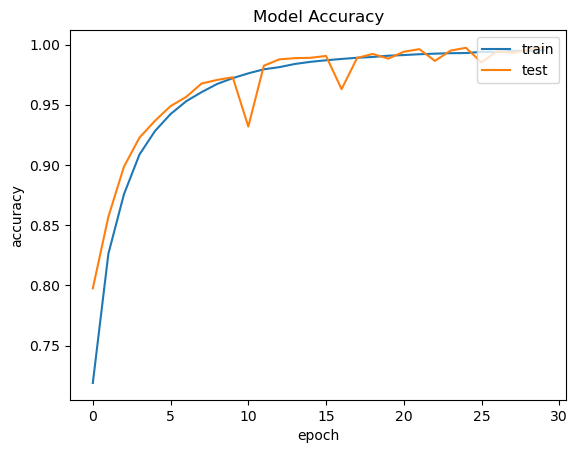

In [121]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper right')

In [122]:
model.save('swell_model.h5')

c:\Users\Olsen\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


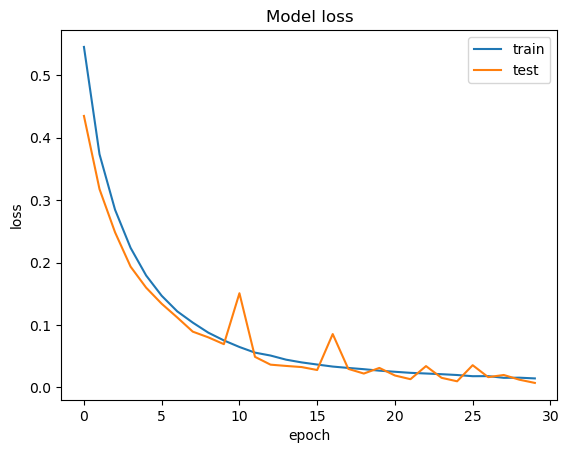

In [123]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper right')

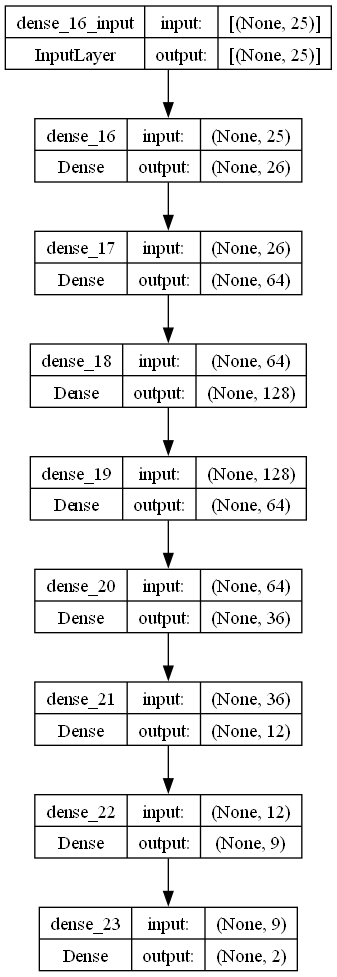

In [124]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Prediction

In [125]:
predictions = model.predict(testSamples, batch_size = 10, verbose = 2)

4104/4104 - 9s - 9s/epoch - 2ms/step


In [126]:
for i in predictions:
    print (i)

[1.000000e+00 1.379739e-10]
[1.9572254e-07 9.9999976e-01]
[9.998690e-01 1.310363e-04]
[9.9999845e-01 1.5783982e-06]
[0.01830855 0.9816914 ]
[0.08854395 0.9114561 ]
[6.4671676e-06 9.9999356e-01]
[1.000000e+00 8.223545e-09]
[2.276483e-08 1.000000e+00]
[1.0000000e+00 4.2482384e-08]
[1.0000000e+00 1.0646312e-10]
[1.6288714e-06 9.9999833e-01]
[9.9999988e-01 1.1122833e-07]
[9.9987757e-01 1.2237653e-04]
[9.999994e-01 6.114308e-07]
[1.0000000e+00 1.3386887e-08]
[1.0031795e-10 1.0000000e+00]
[3.7430485e-07 9.9999964e-01]
[9.053365e-15 1.000000e+00]
[1.0796400e-05 9.9998915e-01]
[1.0000000e+00 1.5912567e-10]
[9.9997640e-01 2.3657905e-05]
[0.99884534 0.0011546 ]
[8.259470e-05 9.999174e-01]
[1.0000000e+00 3.6632457e-11]
[0.01769846 0.9823016 ]
[1.0000000e+00 2.7476337e-12]
[3.8560494e-04 9.9961436e-01]
[9.99884844e-01 1.15199684e-04]
[7.6771445e-12 1.0000000e+00]
[1.0000000e+00 4.7988205e-09]
[9.999764e-01 2.364647e-05]
[1.0000000e+00 1.6954847e-13]
[1.0000000e+00 1.1139791e-12]
[8.4123334e-05 9.9

In [127]:
roundedValue = np.argmax(predictions, axis = -1)

In [128]:
for value in roundedValue:
    print (value)

0
1
0
0
1
1
1
0
1
0
0
1
0
0
0
0
1
1
1
1
0
0
0
1
0
1
0
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
1
0
0
1
1
0
1
1
1
1
1
0
0
1
0
1
0
0
1
0
1
1
1
0
1
1
0
0
0
1
0
1
1
0
1
0
1
1
1
1
0
1
0
0
1
1
1
1
1
0
1
1
1
1
0
0
0
1
0
1
0
1
0
1
0
0
1
1
1
0
0
0
1
0
1
1
0
1
0
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
1
1
0
0
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
0
0
0
0
1
0
0
1
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
1
1
1
0
0
0
0
0
1
1
0
1
1
0
0
1
0
0
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
0
0
0
1
1
1
1
1
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
1
1
1
0
1
1
1
1
0
0
0
1
0
1
1
0
1
0
1
1
0
0
0
1
0
0
1
0
0
0
1
1
1
1
1
0
0
1
1
0
0
1
0
0
0
1
0
0
1
1
0
1
1
1
0
1
1
0
0
0
1
1
1
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
0
1
0
1
0
0
0
1
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
1
1
0
1
1
0
0
0
1
0
0
1


In [129]:
t =pd.DataFrame(testLabels1)

In [130]:
t.value_counts()

0    22158
1    18875
dtype: int64

In [131]:
testDataSet.condition.value_counts()

no stress    22158
stress       18875
Name: condition, dtype: int64

In [132]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(roundedValue,testLabels1)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[22124    83]
 [   34 18792]]


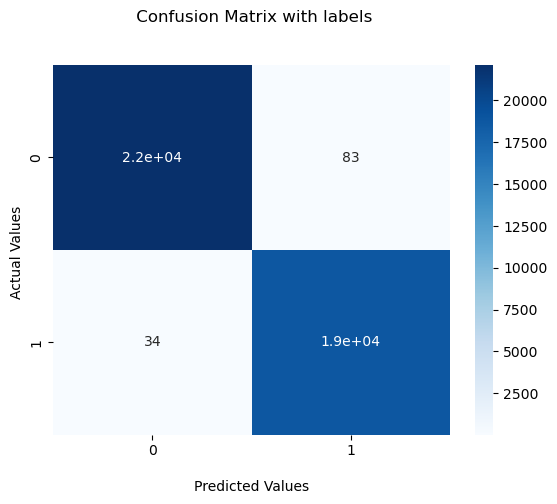

In [133]:

import seaborn as sns

ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])


plt.show()

<Axes: >

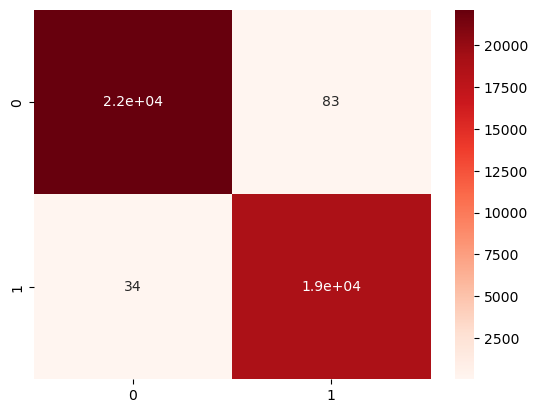

In [134]:
import seaborn as sns
sns.heatmap(confusion, cmap='Reds', annot=True)

In [135]:
model.save('forTransferL_swell.h5')

c:\Users\Olsen\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Axes: title={'center': 'Comparison of all Feature Importances'}, xlabel='Feature Labels', ylabel='Feature Importance'>

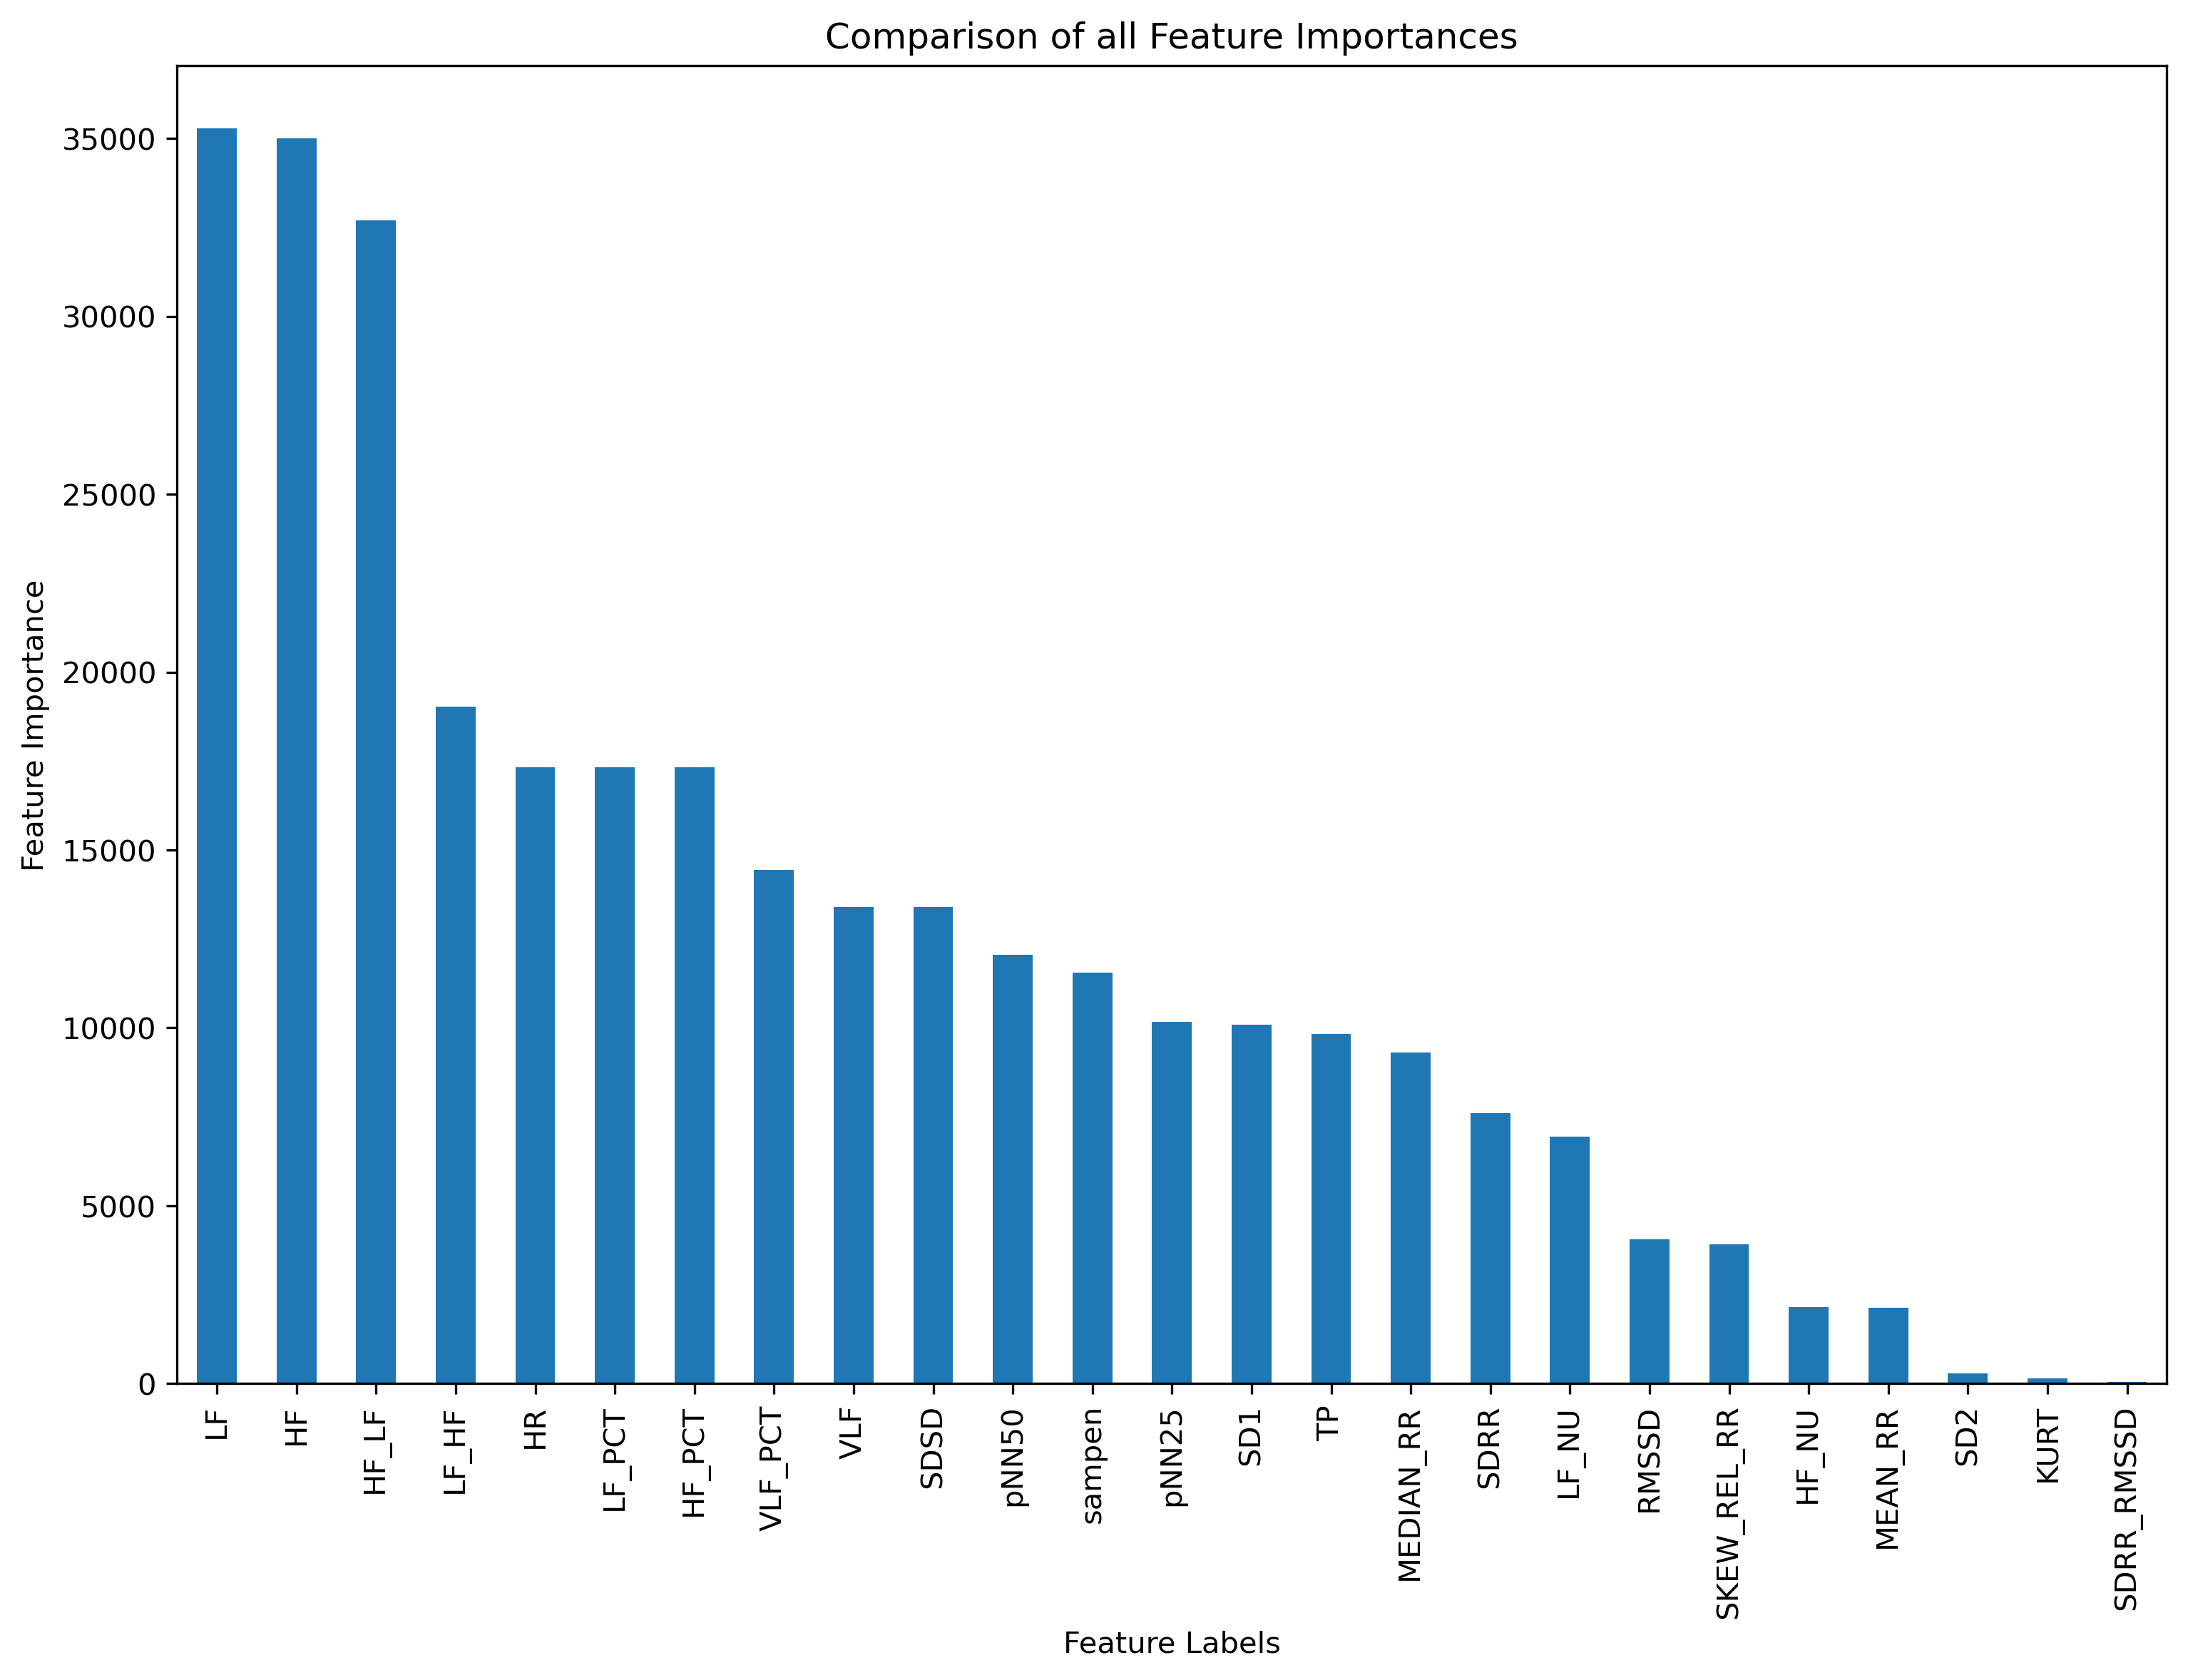

In [137]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif,k='all')
best_features.fit_transform(trainSamples, trainlabels1)

trainDataSet_index = trainDataSet.columns[0:-3]
trainDataSet_index_1 = trainDataSet_index[0:12]
trainDataSet_index_2 = trainDataSet_index[20:]
trainDataSet_index_selected = trainDataSet[trainDataSet_index_1] + trainDataSet[trainDataSet_index_2]


anova = pd.Series(data=best_features.scores_,index=trainDataSet_index_selected.columns)
anova = anova.sort_values(ascending=False)

plt.figure(figsize=(12, 8),dpi=300)
plt.xlabel("Feature Labels")
plt.ylabel("Feature Importance")
plt.title("Comparison of all Feature Importances")
anova.plot.bar()